# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()

# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
mouse_count = mouse_metadata['Mouse ID'].count()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
dups

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dedup_df = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(dups)]
dedup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates_taken_out = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(dups)==False]
duplicates_taken_out

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = duplicates_taken_out["Mouse ID"].nunique()
mouse_count_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_grouped = duplicates_taken_out.groupby('Drug Regimen')

tumor_volume_mean = (drug_regimen_grouped['Tumor Volume (mm3)']).mean()
tumor_volume_median = (drug_regimen_grouped['Tumor Volume (mm3)']).median()
tumor_volume_var = (drug_regimen_grouped['Tumor Volume (mm3)']).var()
tumor_volume_std = (drug_regimen_grouped['Tumor Volume (mm3)']).std()
tumor_volume_sem = (drug_regimen_grouped['Tumor Volume (mm3)']).sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

stats_grouped_by_drug = pd.DataFrame ({"Mean Tumor Volume":tumor_volume_mean,
                                      "Median Tumor Volume":tumor_volume_median,
                                      "Tumor Volume Variance":tumor_volume_var,
                                      "Tumor Volume STD":tumor_volume_std,
                                      "Tumor Volume SEM":tumor_volume_sem})
# Assemble the resulting series into a single summary DataFrame.
stats_grouped_by_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

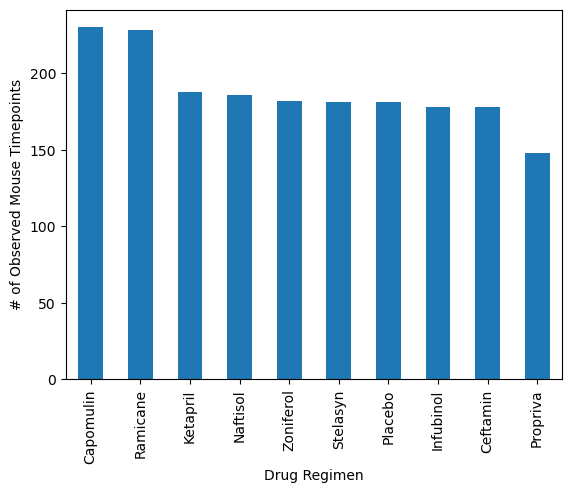

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count_by_drug = duplicates_taken_out["Drug Regimen"].value_counts()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plot_by_drug = mice_count_by_drug.plot(kind="bar")

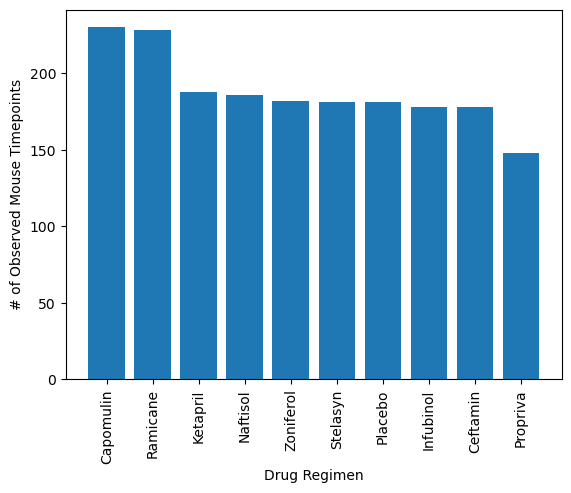

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count_by_drug.index.values


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, mice_count_by_drug)
plt.xticks(rotation="vertical")
plt.show()

Text(0, 0.5, 'Sex')

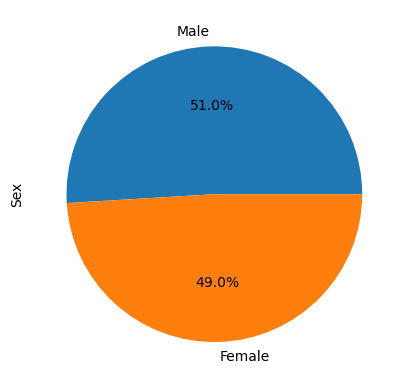

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = duplicates_taken_out["Sex"].value_counts()
plot_by_sex = mice_by_sex.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel('Sex')

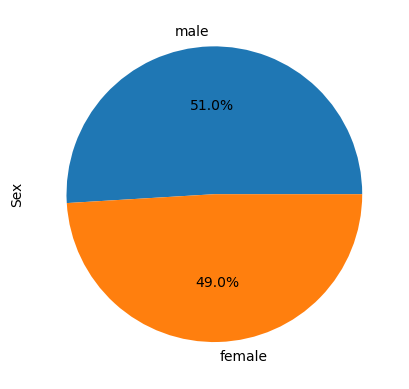

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(mice_by_sex, labels=('male', 'female'), autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


greatest_timepoint = (drug_regimen_grouped['Timepoint']).max()
greatest_timepoint 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)
greatest_timepoint_df_new = pd.merge(greatest_timepoint_df, duplicates_taken_out, how='left', on=("Drug Regimen", "Timepoint"))
greatest_timepoint_df_new


,Drug Regimen,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,45,b128,38.982878,2,Female,9,22
1,Capomulin,45,t565,34.455298,0,Female,20,17
2,Capomulin,45,l509,41.483008,3,Male,17,21
3,Capomulin,45,g288,37.074024,1,Male,3,19
4,Capomulin,45,r554,32.377357,3,Female,8,17
...,...,...,...,...,...,...,...,...
125,Zoniferol,45,a401,66.794156,4,Female,8,25
126,Zoniferol,45,f545,73.324432,1,Female,20,26
127,Zoniferol,45,j365,64.294085,2,Male,24,28
128,Zoniferol,45,p136,63.488697,2,Female,5,28


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    volume_data = greatest_timepoint_df_new.loc[greatest_timepoint_df_new["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume_data)
    
    quartiles = volume_data.quantile([.25,.5,.75])

    iqr = quartiles[.75] - quartiles[.25]


    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = volume_data.loc[(volume_data > upper_bound) | (volume_data < lower_bound)]

print(f"Outlier: {(outliers)}")


Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


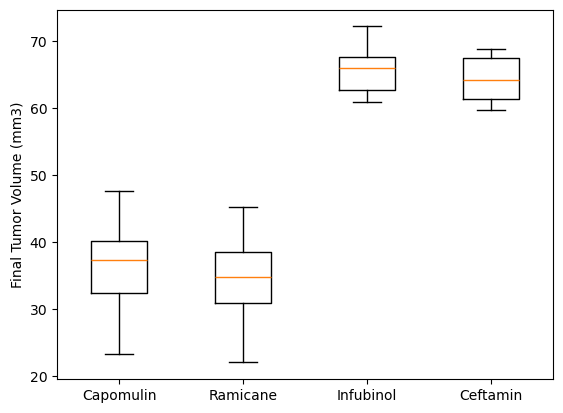

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
box_plot = ax1.boxplot(tumor_volume, labels=treatments)
plt.show()

## Line and Scatter Plots

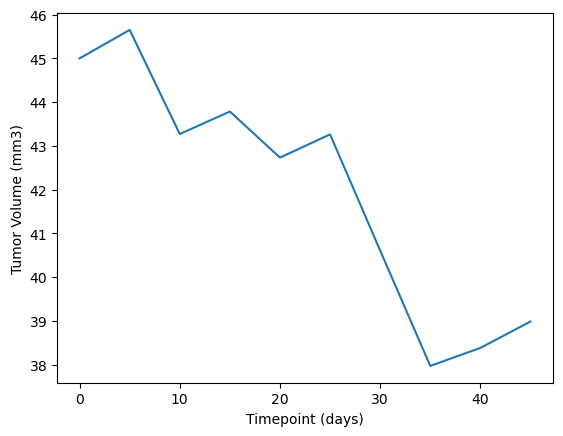

In [207]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot = duplicates_taken_out.loc[duplicates_taken_out["Mouse ID"] == "b128"]

timepoint = line_plot["Timepoint"]
volume = line_plot["Tumor Volume (mm3)"]


plt.plot(timepoint, volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

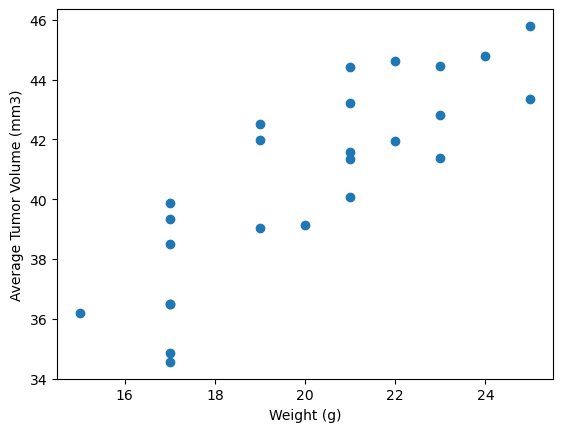

In [95]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter_plot = duplicates_taken_out.loc[duplicates_taken_out["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()



plt.scatter(scatter_plot["Weight (g)"], scatter_plot["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

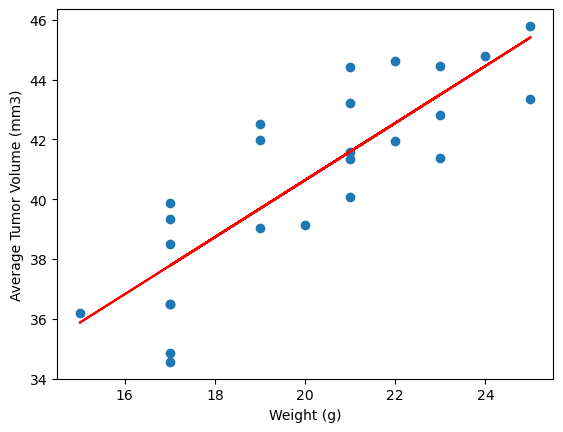

The correlation between mouse weight and the average tumor volume is: 0.84


In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_slope, cap_intercept, cap_rvalue, cap_pvalue, cap_stderr = st.linregress(scatter_plot["Weight (g)"], scatter_plot["Tumor Volume (mm3)"])
capo_values = scatter_plot["Weight (g)"] * cap_slope + cap_intercept

plt.scatter(scatter_plot["Weight (g)"], scatter_plot["Tumor Volume (mm3)"])
plt.plot(scatter_plot["Weight (g)"], capo_values, color = "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is: {round(cap_rvalue,2)}")